In [136]:
print("Let's Start our project!")

Let's Start our project!


Import csv and DataFrame

In [137]:
!pip install pandas 

In [138]:
!pip install seaborn

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


df = pd.read_csv('./data/ecommerce_transactions.csv')
# df.info()
# df.describe()
# df.shape
df

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29
...,...,...,...,...,...,...,...,...
49995,49996,Isabella Rodriguez,53,India,Electronics,140.09,UPI,2024-08-07
49996,49997,Emma Hall,30,France,Home & Kitchen,815.31,Cash on Delivery,2025-02-07
49997,49998,Isabella Allen,50,Australia,Beauty,535.77,UPI,2023-08-11
49998,49999,Olivia Clark,48,Australia,Grocery,370.99,Cash on Delivery,2025-01-02


Understand Data

In [140]:
df.shape

(50000, 8)

In [141]:
df.isna().sum()

Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Transaction_Date    0
dtype: int64

In [142]:
df.dtypes

Transaction_ID        int64
User_Name            object
Age                   int64
Country              object
Product_Category     object
Purchase_Amount     float64
Payment_Method       object
Transaction_Date     object
dtype: object

In [143]:
df.head()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29


Data Cleaning

In [144]:
# Drop 2 unused coliumn
df_drop_col = df.drop('Transaction_ID', axis=1)
filtered_country = df_drop_col.drop('User_Name', axis=1)
filtered_country

,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,63,Mexico,Clothing,780.69,Debit Card,2023-04-14
1,59,India,Beauty,738.56,PayPal,2023-07-30
2,26,France,Books,178.34,Credit Card,2023-09-17
3,43,Mexico,Sports,401.09,UPI,2023-06-21
4,48,Germany,Beauty,594.83,Net Banking,2024-10-29
...,...,...,...,...,...,...
49995,53,India,Electronics,140.09,UPI,2024-08-07
49996,30,France,Home & Kitchen,815.31,Cash on Delivery,2025-02-07
49997,50,Australia,Beauty,535.77,UPI,2023-08-11
49998,48,Australia,Grocery,370.99,Cash on Delivery,2025-01-02


In [145]:
filtered_country['Transaction_Date'] = pd.to_datetime(filtered_country['Transaction_Date'])
filtered_country = filtered_country[filtered_country['Transaction_Date'].dt.year != 2023]
filtered_country = filtered_country[filtered_country['Transaction_Date'] <= '2025-02-28']
print(filtered_country)

       Age    Country Product_Category  Purchase_Amount    Payment_Method  \
4       48    Germany           Beauty           594.83       Net Banking   
5       51      India             Toys           966.50  Cash on Delivery   
6       27    Germany   Home & Kitchen           341.73       Credit Card   
7       46     Canada   Home & Kitchen            11.33        Debit Card   
12      21     France             Toys           380.15            PayPal   
...    ...        ...              ...              ...               ...   
49993   18     France           Beauty           740.53        Debit Card   
49995   53      India      Electronics           140.09               UPI   
49996   30     France   Home & Kitchen           815.31  Cash on Delivery   
49998   48  Australia          Grocery           370.99  Cash on Delivery   
49999   70     Canada           Sports           577.66       Credit Card   

      Transaction_Date  
4           2024-10-29  
5           2025-01-18  


In [146]:
filtered_country.groupby('Country')['Purchase_Amount'].mean()

Country
Australia    502.508282
Brazil       506.207997
Canada       501.390626
France       514.063635
Germany      501.828587
India        500.962158
Japan        499.483750
Mexico       501.686891
UK           501.446862
USA          516.697217
Name: Purchase_Amount, dtype: float64

In [147]:
countries_to_keep = ['India', 'Japan', 'France', 'USA']
filtered_country2 = filtered_country[filtered_country['Country'].isin(countries_to_keep)]
print(filtered_country2)
type(filtered_country2)

       Age Country Product_Category  Purchase_Amount    Payment_Method  \
5       51   India             Toys           966.50  Cash on Delivery   
12      21  France             Toys           380.15            PayPal   
13      26  France             Toys           871.99       Net Banking   
14      18  France         Clothing           382.41        Debit Card   
18      20  France           Beauty           682.74            PayPal   
...    ...     ...              ...              ...               ...   
49982   34   Japan          Grocery           726.08       Credit Card   
49988   38  France      Electronics           144.65        Debit Card   
49993   18  France           Beauty           740.53        Debit Card   
49995   53   India      Electronics           140.09               UPI   
49996   30  France   Home & Kitchen           815.31  Cash on Delivery   

      Transaction_Date  
5           2025-01-18  
12          2024-12-10  
13          2025-02-05  
14         

pandas.core.frame.DataFrame

In [148]:
# Adjust age by decades
filtered_country2 = pd.DataFrame(filtered_country2)
filtered_country2['Age'] = (filtered_country2['Age'] // 10 * 10)
filtered_country2

,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
5,50,India,Toys,966.50,Cash on Delivery,2025-01-18
12,20,France,Toys,380.15,PayPal,2024-12-10
13,20,France,Toys,871.99,Net Banking,2025-02-05
14,10,France,Clothing,382.41,Debit Card,2024-09-28
18,20,France,Beauty,682.74,PayPal,2025-02-12
...,...,...,...,...,...,...
49982,30,Japan,Grocery,726.08,Credit Card,2024-12-31
49988,30,France,Electronics,144.65,Debit Card,2025-01-14
49993,10,France,Beauty,740.53,Debit Card,2024-07-29
49995,50,India,Electronics,140.09,UPI,2024-08-07


In [149]:
filtered_country2

,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
5,50,India,Toys,966.50,Cash on Delivery,2025-01-18
12,20,France,Toys,380.15,PayPal,2024-12-10
13,20,France,Toys,871.99,Net Banking,2025-02-05
14,10,France,Clothing,382.41,Debit Card,2024-09-28
18,20,France,Beauty,682.74,PayPal,2025-02-12
...,...,...,...,...,...,...
49982,30,Japan,Grocery,726.08,Credit Card,2024-12-31
49988,30,France,Electronics,144.65,Debit Card,2025-01-14
49993,10,France,Beauty,740.53,Debit Card,2024-07-29
49995,50,India,Electronics,140.09,UPI,2024-08-07


Statisical Data

In [150]:
print("Mean is", filtered_country2['Age'].mean())
print("Meadian is", filtered_country2['Age'].median())
print("Mean is", filtered_country2['Purchase_Amount'].mean())
print("Meadian is", filtered_country2['Purchase_Amount'].median())

Mean is 39.35930735930736
Meadian is 40.0
Mean is 507.890387012987
Meadian is 509.435


Plot Graph

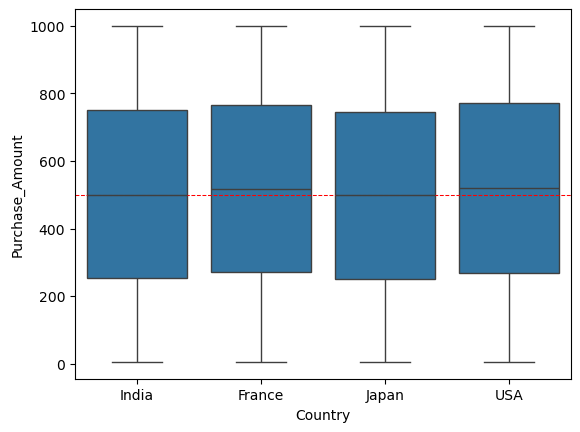

In [151]:
sns.boxplot(data=filtered_country2, x='Country', y='Purchase_Amount')
plt.axhline(y=500, color='red', linestyle='--', linewidth=0.75)
plt.show ()

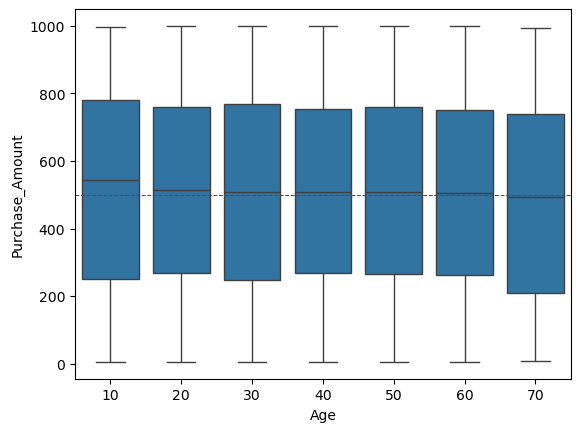

In [152]:
sns.boxplot(data=filtered_country2, x='Age', y='Purchase_Amount')
plt.axhline(y=500, color='red', linestyle='--', linewidth=0.75)
plt.show ()

In [153]:
colors = ["#1241a7", '#ff7f0e', '#2ca02c', '#b50000']

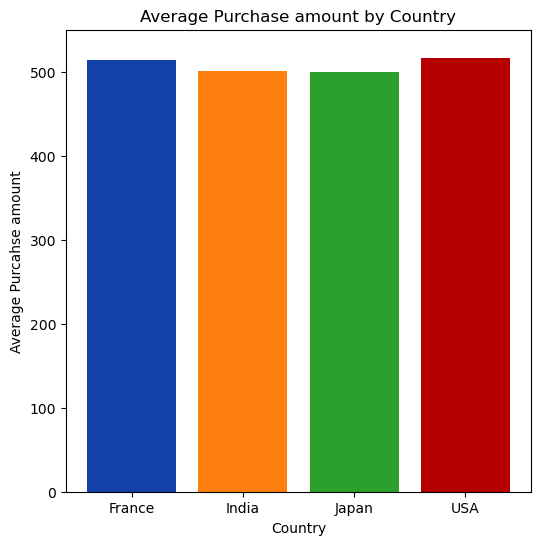

In [154]:
fig, ax = plt.subplots(figsize=(6, 6))

Country_stats = filtered_country2.groupby('Country')['Purchase_Amount'].mean()
ax.bar(Country_stats.index, Country_stats.values, color=colors)

ax.set_xlabel('Country')
ax.set_ylabel('Average Purcahse amount')
ax.set_title('Average Purchase amount by Country')
ax.set_ylim(0, 550)

plt.show()

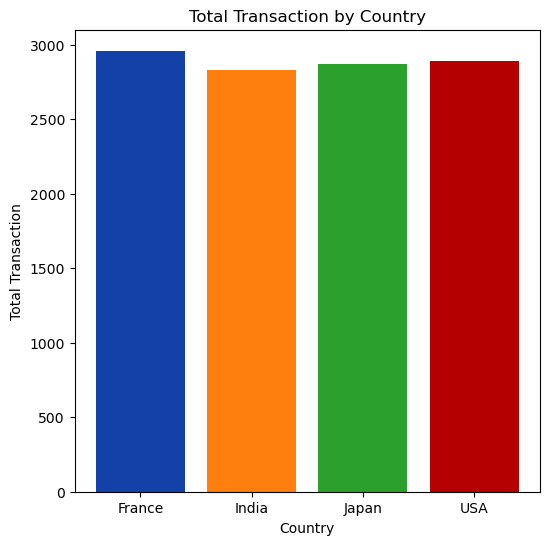

In [155]:
fig, ax = plt.subplots(figsize=(6, 6))

Transaction_stats = filtered_country2.groupby('Country')['Purchase_Amount'].count()
ax.bar(Transaction_stats.index, Transaction_stats.values, color=colors)

ax.set_xlabel('Country')
ax.set_ylabel('Total Transaction')
ax.set_title('Total Transaction by Country')
ax.set_ylim(0, 3100)

plt.show()

In [156]:
# import seaborn as sns

# # Create the figure and axis objects
# fig, ax = plt.subplots(figsize=(12, 6))

# # Plot the scatter plot using Seaborn
# sns.scatterplot(x='Product_Category', y='Age', data=filtered_country, ax=ax)

# # Add labels and title
# ax.set_xlabel('Product_Category')
# ax.set_ylabel('Age')
# ax.set_title('Relationship between Age and Purchase Amount')

# plt.show()

In [157]:
from matplotlib.colors import LinearSegmentedColormap

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list('my_cmap', ["#ebb87d", '#dddddd','#0a49a7'])

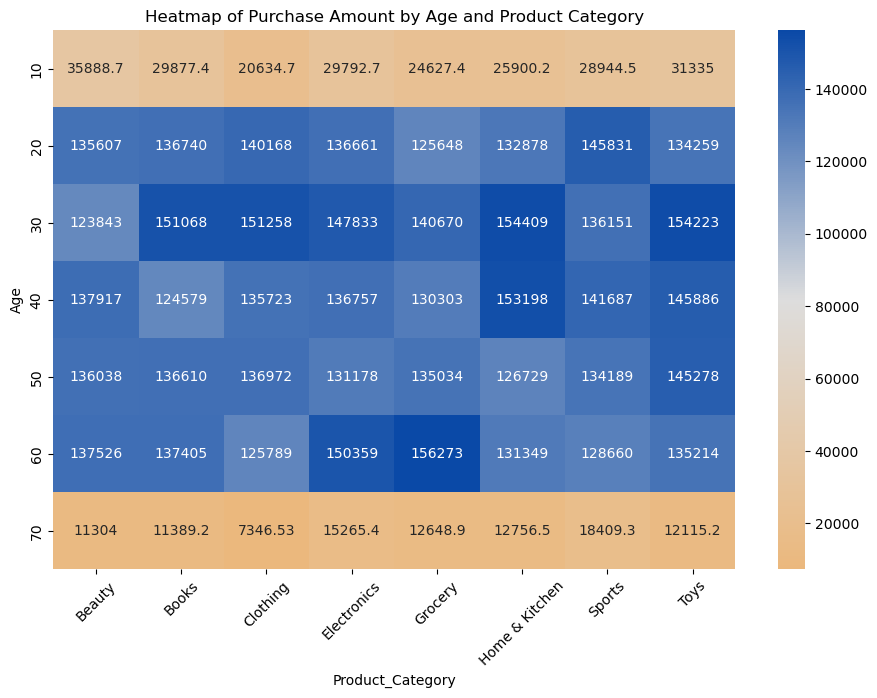

In [158]:
# Create a pivot table
pivot_table = filtered_country2.pivot_table(values='Purchase_Amount', 
                                             index='Age', 
                                             columns='Product_Category', 
                                             aggfunc='sum', 
                                             fill_value=0)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(11, 7))

# Plot the heatmap using Seaborn
sns.heatmap(pivot_table, annot=True, fmt='g', cmap=custom_cmap, ax=ax)

# Add labels and title
ax.set_xlabel('Product_Category')
plt.xticks(rotation=45)
ax.set_ylabel('Age')
ax.set_title('Heatmap of Purchase Amount by Age and Product Category')

plt.show()

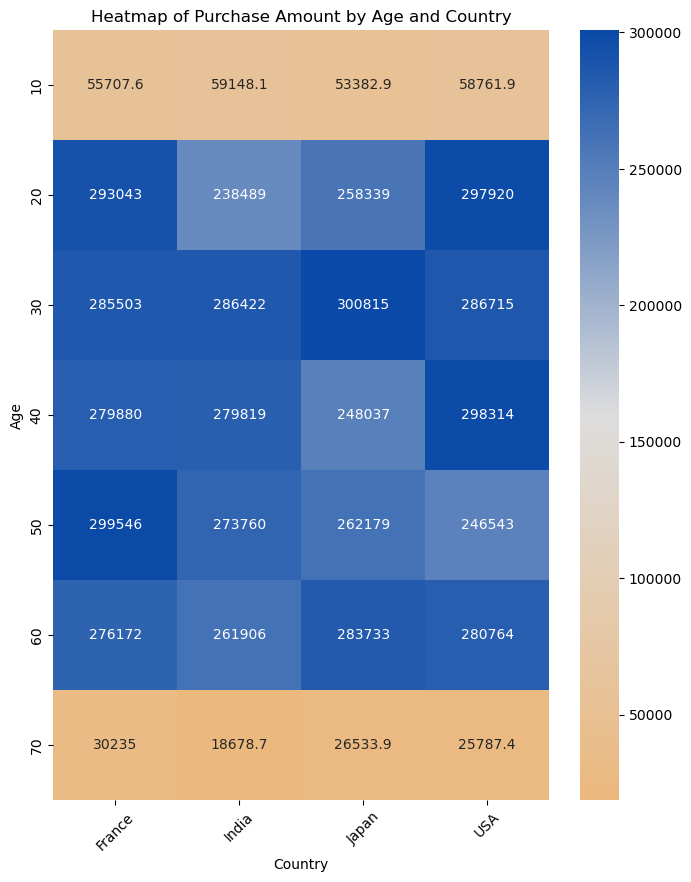

In [159]:
# Create a pivot table
pivot_table = filtered_country2.pivot_table(values='Purchase_Amount', 
                                             index='Age', 
                                             columns='Country', 
                                             aggfunc='sum', 
                                             fill_value=0)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 10))

# Plot the heatmap using Seaborn
sns.heatmap(pivot_table, annot=True, fmt='g', cmap=custom_cmap, ax=ax)

# Add labels and title
ax.set_xlabel('Country')
plt.xticks(rotation=45)
ax.set_ylabel('Age')
ax.set_title('Heatmap of Purchase Amount by Age and Country')

plt.show()

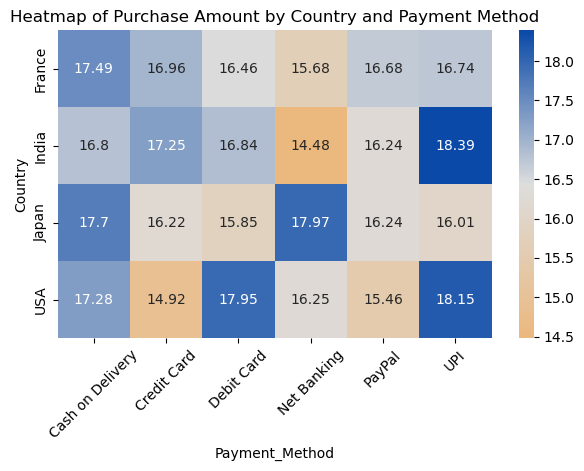

In [160]:
# Create a pivot table

total_purchases = filtered_country2.groupby('Country')['Purchase_Amount'].sum().reset_index()
total_purchases.rename(columns={'Purchase_Amount': 'Total_Amount'}, inplace=True)

pivot_table = filtered_country2.pivot_table(values='Purchase_Amount', 
                                             index='Country', 
                                             columns='Payment_Method', 
                                             aggfunc='sum', 
                                             fill_value=0)

percentage_table = round(pivot_table.div(total_purchases.set_index('Country')['Total_Amount'], axis=0) * 100, 2)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(7, 4))

# Plot the heatmap using Seaborn
sns.heatmap(percentage_table, annot=True, fmt='g', cmap=custom_cmap, ax=ax)

# Add labels and title
ax.set_xlabel('Payment_Method')
plt.xticks(rotation=45)
ax.set_ylabel('Country')
ax.set_title('Heatmap of Purchase Amount by Country and Payment Method')

plt.show()

In [161]:
# sns.barplot(data=filtered_country2, x = 'Age' ,y ="Purchase_Amount", palette= "deep")
# plt.show()

# # Palette Testing

In [162]:
# import numpy as np
# filtered_country2.Country.value_counts()
# #filtered_country2.Product_Category.value_counts()
# #filtered_country2.Payment_Method.value_counts()
# filtered_country2.Country.value_counts().plot(kind='bar', figsize=(9,6),color=np.random.rand(10,3))
# plt.title('Transactions by Country Count')
# plt.xlabel('Country')
# plt.xticks(rotation=45)
# plt.show()

# # Styling Testing

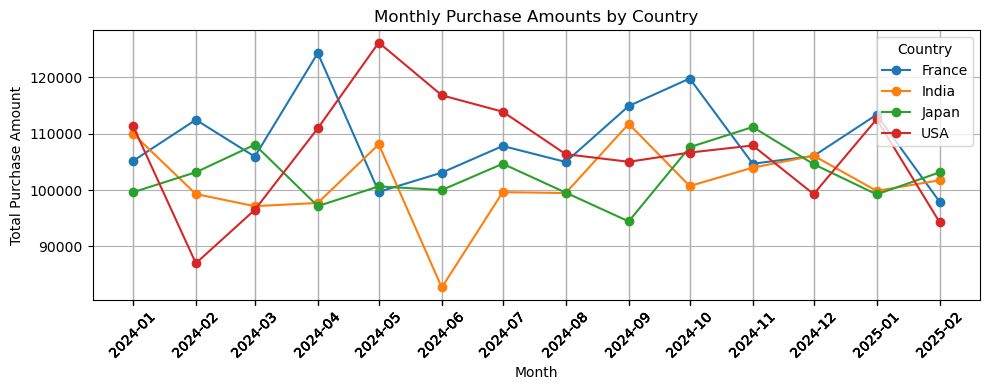

In [163]:
import matplotlib.dates as mdates # Import for date formatting
date_form = mdates.DateFormatter('%Y-%m')

# Group by YearMonth and Country, then sum Purchase_Amount
filtered_country2['YearMonth'] = filtered_country2['Transaction_Date'].dt.to_period('M')
monthly_totals = filtered_country2.groupby(['YearMonth', 'Country'])['Purchase_Amount'].sum().reset_index()

# Convert YearMonth back to datetime for plotting
monthly_totals['YearMonth'] = monthly_totals['YearMonth'].dt.to_timestamp()

# Plot the results
plt.figure(figsize=(10, 4))

# Plot separate lines for each country
for country in monthly_totals['Country'].unique():
    country_data = monthly_totals[monthly_totals['Country'] == country]
    plt.plot(country_data['YearMonth'], country_data['Purchase_Amount'], marker='o', label=country)

# Format the plot
plt.xticks(monthly_totals['YearMonth'], rotation=45)  # Rotate x labels for better visibility
plt.gca().xaxis.set_major_formatter(date_form)
plt.title('Monthly Purchase Amounts by Country')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Country')
plt.grid()
plt.tight_layout()
plt.show()

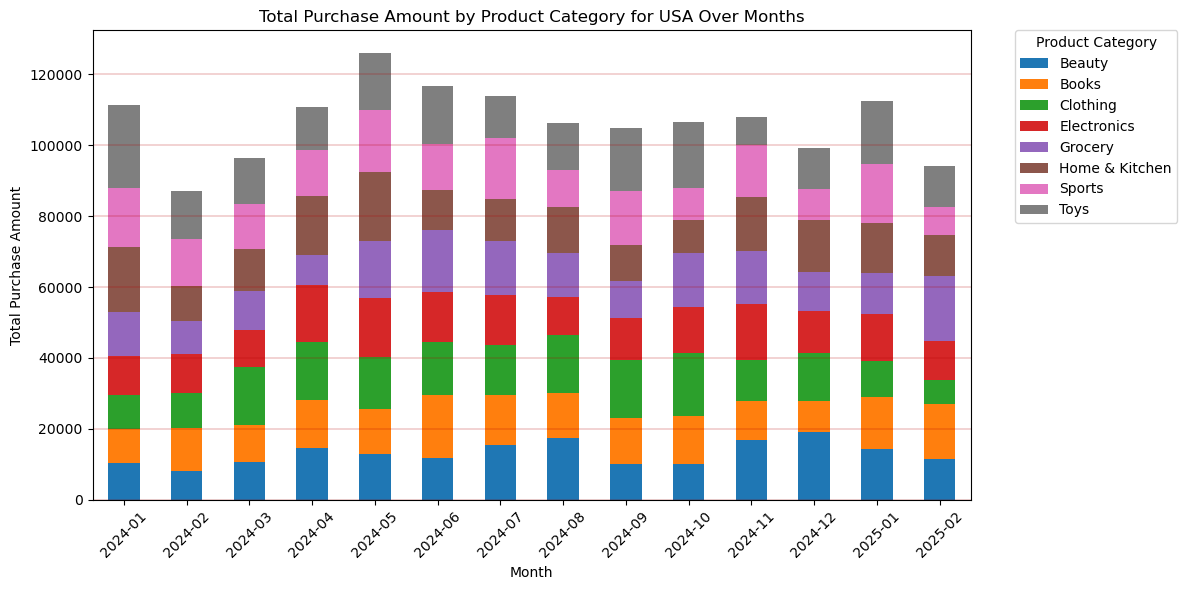

In [182]:
country_name = 'USA'
filtered_country = filtered_country2[filtered_country2['Country'] == country_name]

# Group by YearMonth and Product_Category, then sum Purchase_Amount
monthly_category_totals = filtered_country.groupby(['YearMonth', 'Product_Category'])['Purchase_Amount'].sum().reset_index()

# Pivot the table for easier plotting
pivot_data = monthly_category_totals.pivot(index='YearMonth', columns='Product_Category', values='Purchase_Amount').fillna(0)

# Plot the results as a stacked bar chart
plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', stacked=True, ax=plt.gca())

# Format the plot
plt.title(f'Total Purchase Amount by Product Category for {country_name} Over Months')

plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category',bbox_to_anchor=(1.05, 1), borderaxespad=0., prop={'size': 10})
plt.grid(axis='y', color=colors[3], linewidth=0.25)
plt.tight_layout()
plt.show()

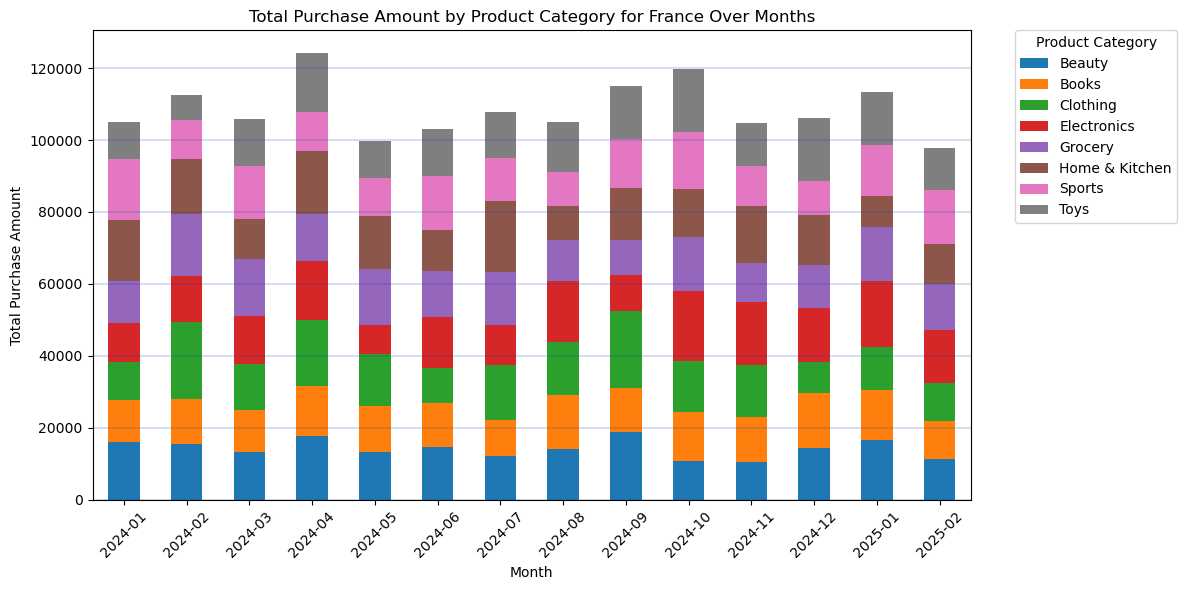

In [183]:
country_name = 'France'
filtered_country = filtered_country2[filtered_country2['Country'] == country_name]

# Group by YearMonth and Product_Category, then sum Purchase_Amount
monthly_category_totals = filtered_country.groupby(['YearMonth', 'Product_Category'])['Purchase_Amount'].sum().reset_index()

# Pivot the table for easier plotting
pivot_data = monthly_category_totals.pivot(index='YearMonth', columns='Product_Category', values='Purchase_Amount').fillna(0)

# Plot the results as a stacked bar chart
plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', stacked=True, ax=plt.gca())

# Format the plot
plt.title(f'Total Purchase Amount by Product Category for {country_name} Over Months')

plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category',bbox_to_anchor=(1.05, 1), borderaxespad=0., prop={'size': 10})
plt.grid(axis='y', color=colors[0], linewidth=0.25)
plt.tight_layout()
plt.show()

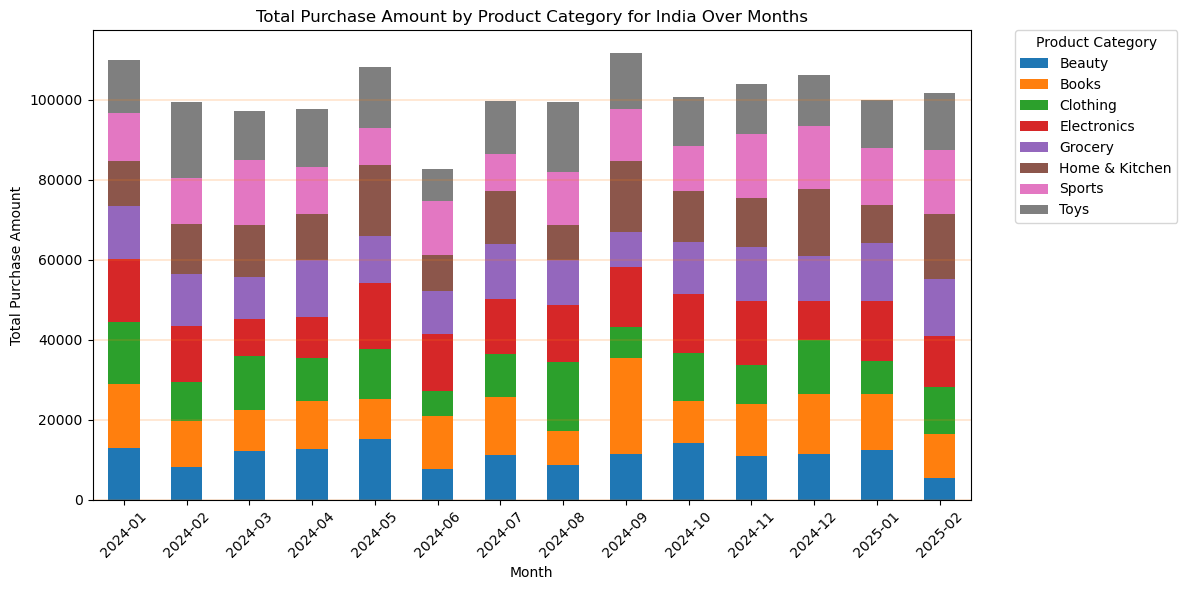

In [185]:
country_name = 'India'
filtered_country = filtered_country2[filtered_country2['Country'] == country_name]

# Group by YearMonth and Product_Category, then sum Purchase_Amount
monthly_category_totals = filtered_country.groupby(['YearMonth', 'Product_Category'])['Purchase_Amount'].sum().reset_index()

# Pivot the table for easier plotting
pivot_data = monthly_category_totals.pivot(index='YearMonth', columns='Product_Category', values='Purchase_Amount').fillna(0)

# Plot the results as a stacked bar chart
plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', stacked=True, ax=plt.gca())

# Format the plot
plt.title(f'Total Purchase Amount by Product Category for {country_name} Over Months')

plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category',bbox_to_anchor=(1.05, 1), borderaxespad=0., prop={'size': 10})
plt.grid(axis='y',  color=colors[1], linewidth=0.25)
plt.tight_layout()
plt.show()

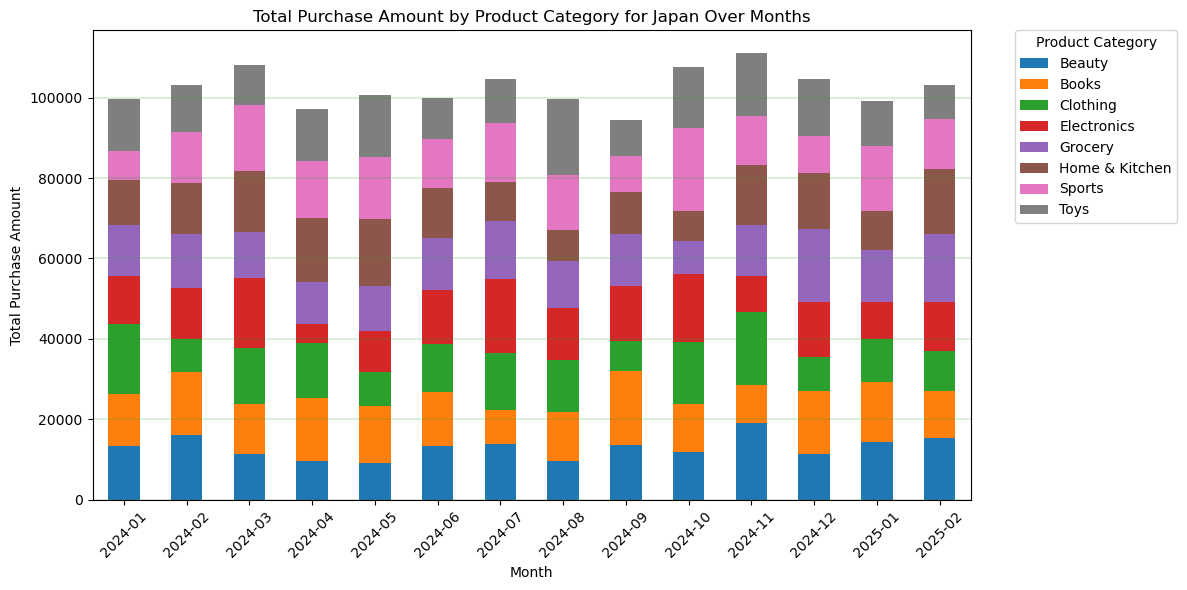

In [186]:
country_name = 'Japan'
filtered_country = filtered_country2[filtered_country2['Country'] == country_name]

# Group by YearMonth and Product_Category, then sum Purchase_Amount
monthly_category_totals = filtered_country.groupby(['YearMonth', 'Product_Category'])['Purchase_Amount'].sum().reset_index()

# Pivot the table for easier plotting
pivot_data = monthly_category_totals.pivot(index='YearMonth', columns='Product_Category', values='Purchase_Amount').fillna(0)

# Plot the results as a stacked bar chart
plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', stacked=True, ax=plt.gca())

# Format the plot
plt.title(f'Total Purchase Amount by Product Category for {country_name} Over Months')

plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category',bbox_to_anchor=(1.05, 1), borderaxespad=0., prop={'size': 10})
plt.grid(axis='y', color=colors[2], linewidth=0.25)
plt.tight_layout()
plt.show()

In [168]:
pd.crosstab(filtered_country2.Product_Category, filtered_country2.Country, margins=True)

Country,France,India,Japan,USA,All
Product_Category,,,,,
Beauty,367,306,372,344,1389
Books,350,365,366,345,1426
Clothing,376,325,348,375,1424
Electronics,386,390,356,350,1482
Grocery,378,341,361,363,1443
Home & Kitchen,383,357,347,351,1438
Sports,354,359,365,363,1441
Toys,363,388,354,402,1507
All,2957,2831,2869,2893,11550


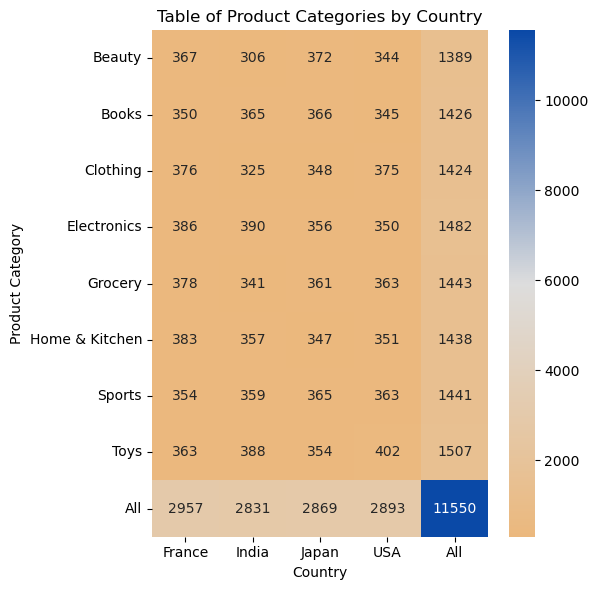

In [169]:
crosstab_data = pd.crosstab(filtered_country2.Product_Category, filtered_country2.Country, margins=True)

# Plotting the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(crosstab_data, annot=True, fmt='g', cmap=custom_cmap, cbar=True)

# Formatting the plot
plt.title('Table of Product Categories by Country')
plt.xlabel('Country')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

In [170]:
# # Boxplot
# filtered_country2.boxplot(column='Purchase_Amount', by='Age')
# plt.show()

In [171]:
# #kde plot - kernel density estimate
# filtered_country2.groupby('Age').Purchase_Amount.plot.kde(figsize=(7,5))
# plt.legend(loc='upper right', fontsize=10)
# plt.show()

Univariate Analysis

In [172]:
# print("Median: ", filtered_country2["Age"].median()) #.mean(), .std()
# filtered_country2.Age.value_counts()

In [173]:
# ## Univerate analysis 2
# import matplotlib.pyplot as plt

# #Box plots
# filtered_country2.boxplot(column=['Purchase_Amount'], grid=False, color='black') #Doesn't seem to be working with a list of ints
# plt.show()

# #Histogram:
# filtered_country2.hist(column='Purchase_Amount', grid=False, edgecolor='black')
# plt.show() #Use this when sometime things get buggy

# #Density curves:
# import seaborn as sns
# sns.kdeplot(df['Purchase_Amount']) #KDE = kernal density function 
# plt.show()

In [174]:
# ## Univerate analysis continued:
# import matplotlib.pyplot as plt

# #Box plots
# filtered_country2.boxplot(column=['Age'], grid=False, color='blue') #Doesn't seem to be working with a list of ints
# plt.show()

# #Histogram:
# filtered_country2.hist(column='Age', grid=False, edgecolor='blue')
# plt.show() #Use this when sometime things get buggy

# #Density curves:
# import seaborn as sns
# sns.kdeplot(df['Age']) #KDE = kernal density function 
# plt.show()

Bi-variate Analysis

In [175]:
# #Bi-variate analysis: #legend
# import seaborn as sns
# import pandas as pd
# sns.heatmap (pd.crosstab(filtered_country2.Purchase_Amount, filtered_country2.Age)) #Crosstab = frequency table #Work best with categotical vars/ discrete vars
# plt.show()

In [176]:
# filtered_country2.corr(numeric_only=True)
# sns.heatmap(filtered_country2.corr(numeric_only=True),annot=True)
# plt.show()

In [177]:
# #Bi-variate analysis - Contour plots:
# sns.kdeplot(x=filtered_country2.Age, y=filtered_country2.Purchase_Amount, cmap="Blues", fill=True, bw_adjust=0.8) # cmp = color map
# plt.show()

Multivariate Analysis

In [178]:
# ## Multivariate analysis:
# import seaborn as sns
# sns.kdeplot(data = filtered_country2, bw_adjust=0.2, fill = False) #KDE = kernal density function  #Can enable shade to be true/false 
# plt.show()